## Benchmarking Models and Enhancing GradientBoosting Regressor: Improving Weekly Sales Prediction Accuracy from 200,000 dollars to 100,000 dollars through Feature Engineering and Fine-Tuning

### Data Extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Benchmarking (LinearRegression, Lasso, Ridge, ElasticNet, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegressor)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

### Training function

In [ ]:
# Define the model function
def model(y_test, y_train, X_test, X_train, model_class):
    # Instantiate and fit the model
    model_instance = model_class()
    model_instance.fit(X_train, y_train)

    # Predictions
    y_pred_train = model_instance.predict(X_train)
    y_pred_test = model_instance.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print metrics
    print('-----------------')
    print(model_class.__name__)
    print('-----------------')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R2 : {round(r2 * 100, 2)} %')
    print(f'RMSE (Training): {rmse_train}')
    print(f'RMSE (Testing): {rmse_test}')

    return rmse_train, rmse_test

### Benchmarking the models on MSE/MAE/R2/RMSE

-----------------
LinearRegression
-----------------
MSE: 274455221280.6605
MAE: 433274.8811147915
R2 : 14.81 %
RMSE (Training): 522688.543833527
RMSE (Testing): 523884.7404541007
-----------------
Lasso
-----------------
MSE: 274455022604.9151
MAE: 433274.64629920805
R2 : 14.81 %
RMSE (Training): 522688.54385403823
RMSE (Testing): 523884.55083626497
-----------------
Ridge
-----------------
MSE: 274454468222.2198
MAE: 433272.7721112345
R2 : 14.81 %
RMSE (Training): 522688.54727215634
RMSE (Testing): 523884.02172830177
-----------------
ElasticNet
-----------------
MSE: 274337217802.38452
MAE: 433101.20505890925
R2 : 14.84 %
RMSE (Training): 522996.4339348991
RMSE (Testing): 523772.10483413923
-----------------
RandomForestRegressor
-----------------
MSE: 21419189118.773075
MAE: 76625.00142703962
R2 : 93.35 %
RMSE (Training): 54372.940723602165
RMSE (Testing): 146352.96074481402
-----------------
KNeighborsRegressor
-----------------
MSE: 91052834143.25735
MAE: 191597.05669308468
R2 : 

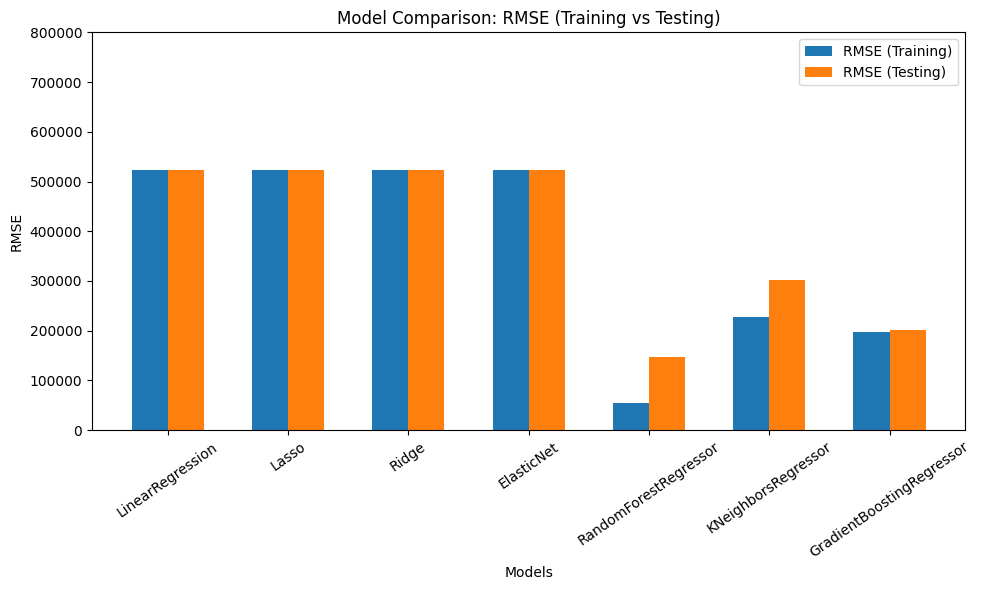

In [ ]:
# Defining our features
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Collect RMSE values for different models
rmse_values = []
models = [LinearRegression, Lasso, Ridge, ElasticNet, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegressor]
for model_class in models:
    rmse_train, rmse_test = model(y_test, y_train, X_test, X_train, model_class)
    rmse_values.append((model_class.__name__, rmse_train, rmse_test))

# Convert the results to a DataFrame for easier plotting
Model_Evaluation_Comparison_Matrix = pd.DataFrame(rmse_values, columns=['Model', 'RMSE (Training)', 'RMSE (Testing)'])

# Plotting
bar_width = 0.3
x = np.arange(len(Model_Evaluation_Comparison_Matrix))

plt.figure(figsize=(10, 6))
plt.bar(x, Model_Evaluation_Comparison_Matrix['RMSE (Training)'], width=bar_width, label='RMSE (Training)', align='center')
plt.bar(x + bar_width, Model_Evaluation_Comparison_Matrix['RMSE (Testing)'], width=bar_width, label='RMSE (Testing)', align='center')
plt.xticks(x + bar_width / 2, Model_Evaluation_Comparison_Matrix['Model'], rotation=35)
plt.legend()
plt.ylim([0, 800000])  # Adjust the y-axis limit as needed
plt.title('Model Comparison: RMSE (Training vs Testing)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

## The benchmark results indicate that the RandomForestRegressor and GradientBoostingRegressor models performed best and show the most potential for our data

### 1- Improving the GradientBoostingRegressor model

### 1-1- Feature Engineering

In [3]:
#Adding the date features
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year, month, and week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


### Benchmarking after feature engineering

-----------------
LinearRegression
-----------------
MSE: 272049348139.45163
MAE: 432594.9768878015
R2 : 15.55 %
RMSE (Training): 520236.6251081569
RMSE (Testing): 521583.50063959236
-----------------
Lasso
-----------------
MSE: 272049343003.18848
MAE: 432595.01124455436
R2 : 15.55 %
RMSE (Training): 520236.6252535405
RMSE (Testing): 521583.49571587145
-----------------
Ridge
-----------------
MSE: 272049748000.39166
MAE: 432595.1667087358
R2 : 15.55 %
RMSE (Training): 520236.6300015132
RMSE (Testing): 521583.88395385805
-----------------
ElasticNet
-----------------
MSE: 272271762806.59677
MAE: 432792.57221826457
R2 : 15.48 %
RMSE (Training): 520672.9903283823
RMSE (Testing): 521796.6680677415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+14, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(


-----------------
RandomForestRegressor
-----------------
MSE: 13037581711.312958
MAE: 61756.53961048951
R2 : 95.95 %
RMSE (Training): 41500.70338636081
RMSE (Testing): 114182.2302782397
-----------------
KNeighborsRegressor
-----------------
MSE: 126274866936.3597
MAE: 239435.34243201246
R2 : 60.8 %
RMSE (Training): 273409.043355509
RMSE (Testing): 355351.75099661417
-----------------
GradientBoostingRegressor
-----------------
MSE: 26960669928.893837
MAE: 122332.01229476905
R2 : 91.63 %
RMSE (Training): 160632.91574842378
RMSE (Testing): 164197.0460419244


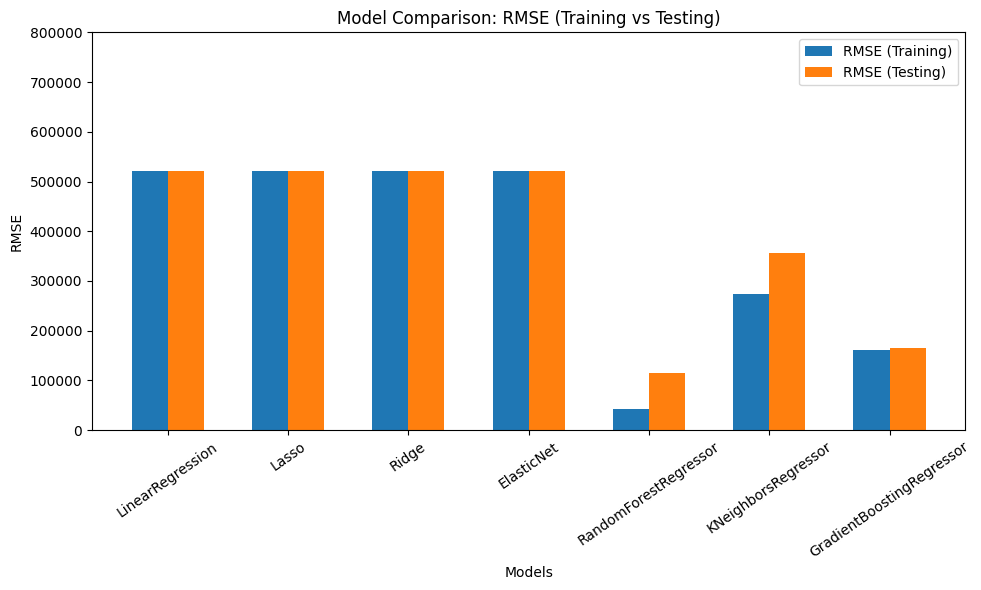

In [ ]:
# Assuming df is your DataFrame
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Month','Year','Week']]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Collect RMSE values for different models
rmse_values = []
models = [LinearRegression, Lasso, Ridge, ElasticNet, RandomForestRegressor, KNeighborsRegressor, GradientBoostingRegressor]
for model_class in models:
    rmse_train, rmse_test = model(y_test, y_train, X_test, X_train, model_class)
    rmse_values.append((model_class.__name__, rmse_train, rmse_test))

# Convert the results to a DataFrame for easier plotting
Model_Evaluation_Comparison_Matrix = pd.DataFrame(rmse_values, columns=['Model', 'RMSE (Training)', 'RMSE (Testing)'])

# Plotting
bar_width = 0.3
x = np.arange(len(Model_Evaluation_Comparison_Matrix))

plt.figure(figsize=(10, 6))
plt.bar(x, Model_Evaluation_Comparison_Matrix['RMSE (Training)'], width=bar_width, label='RMSE (Training)', align='center')
plt.bar(x + bar_width, Model_Evaluation_Comparison_Matrix['RMSE (Testing)'], width=bar_width, label='RMSE (Testing)', align='center')
plt.xticks(x + bar_width / 2, Model_Evaluation_Comparison_Matrix['Model'], rotation=35)
plt.legend()
plt.ylim([0, 800000])  # Adjust the y-axis limit as needed
plt.title('Model Comparison: RMSE (Training vs Testing)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


### Conclusion: Adding 'Month', 'Year', and 'Week' as features significantly improved model performance. For instance, the GradientBoostingRegressor's metrics improved from an RMSE of 197,340 (Training), 200,974 (Testing), and R² of 87.46% to an RMSE of 160,632 (Training), 164,197 (Testing), and R² of 91.63%.

### 1-2- Hyperparameter tuning

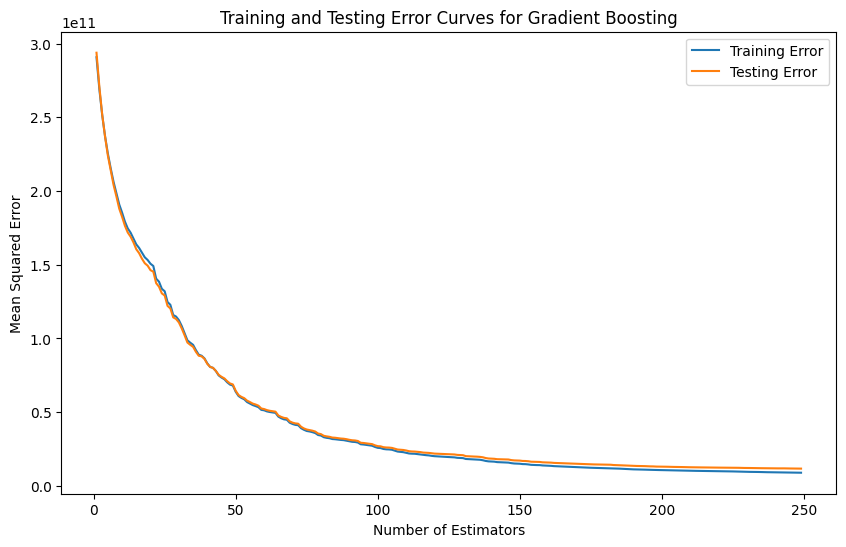

Cross-Validated RMSE: 109722.52291799539 ± 5564.713676089003


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Month','Year','Week']]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gboost_reg = GradientBoostingRegressor(random_state=48)

# Lists to store training and testing errors
train_errors = []
test_errors = []

# Train the model and collect errors for each iteration
for n_estimators in range(1, 250):
    gboost_reg.set_params(n_estimators=n_estimators)
    gboost_reg.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = gboost_reg.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    # Predict on the testing set
    y_test_pred = gboost_reg.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualize training and testing error curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, 250), train_errors, label='Training Error')
plt.plot(range(1, 250), test_errors, label='Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error Curves for Gradient Boosting')
plt.legend()
plt.show()

# Use cross-validation to evaluate the model performance
cv_scores = cross_val_score(gboost_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5  # Convert MSE to RMSE

# Print cross-validation results
print(f'Cross-Validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and configure a Gradient Boosting Regressor model with final n_estimators
gboost_reg = GradientBoostingRegressor(n_estimators=250, random_state=48)
gboost_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = gboost_reg.predict(X_train)

# Calculate training R^2 score
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R^2 Score: {train_r2}')

# Calculate and print RMSE for cross-validation (for reference)
cv_scores = cross_val_score(gboost_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5  # Convert MSE to RMSE
print(f'Cross-Validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')


Training R^2 Score: 0.9720275908770003
Cross-Validated RMSE: 109592.02701461506 ± 5554.377632230428


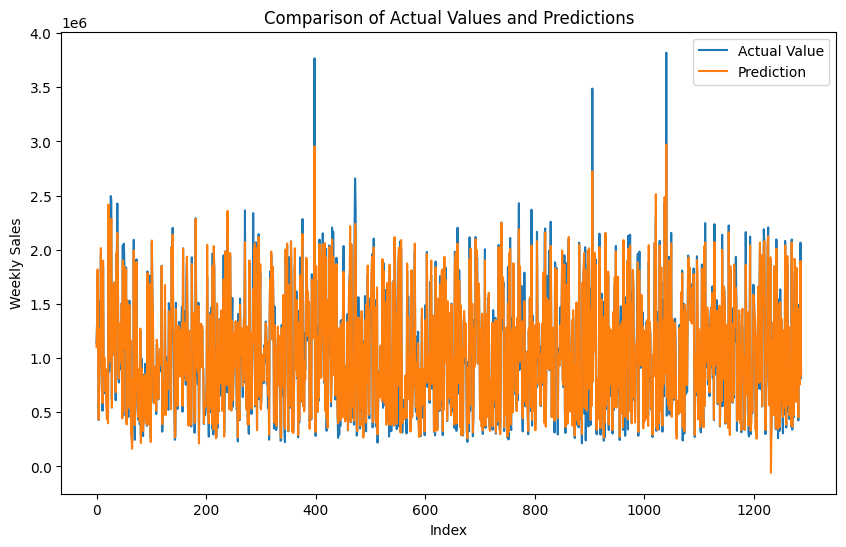

In [8]:
# Set a specific number of estimators for final predictions (e.g., 100)
gboost_reg.set_params(n_estimators=250)
gboost_reg.fit(X_train, y_train)

# Final predictions on the test set
y_test_pred_final = gboost_reg.predict(X_test)

# Create a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual Value': y_test, 'Prediction': y_test_pred_final})
results_df['Difference'] = results_df['Actual Value'] - results_df['Prediction']

# Display a plot comparing actual values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Value'].values, label='Actual Value')
plt.plot(results_df['Prediction'].values, label='Prediction')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual Values and Predictions')
plt.legend()
plt.show()

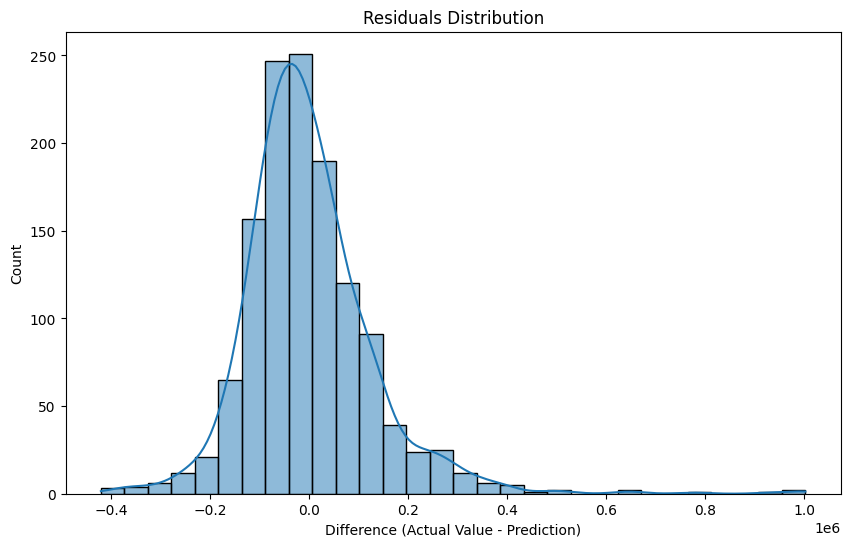

In [26]:
# Display a histogram of the residuals (differences)
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Difference'], bins=30, kde=True)
plt.xlabel('Difference (Actual Value - Prediction)')
plt.title('Residuals Distribution')
plt.show()

### In conclusion, after applying hyperparameter tuning and feature engineering, we improved our weekly sales predictions from an initial error of approximately 200,000 dollars to around 100,000 dollars, with an R^2 Score of 96% achieving this without overfitting the model.


### 2- Improving the RandomForestRegressor model

**As observed in the benchmark, there is a significant gap between the training and testing RMSE values for the RandomForestRegressor model, even though it achieved the best results. To address this issue, we will try hyperparameter tuning on the newly generated data:**

### 2-1- Hyperparameter tuning

In [15]:
# Define the model function
def model(y_test, y_train, X_test, X_train, model):
    model1 = model()
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)

    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'R2 : {round(r2_score(y_test, y_pred) * 100, 2)} %')

    return mean_squared_error(y_train, model1.predict(X_train)), mean_squared_error(y_test, y_pred)

Final RMSE (Training): 388510.3112191953
Final RMSE (Testing): 393411.81435104355


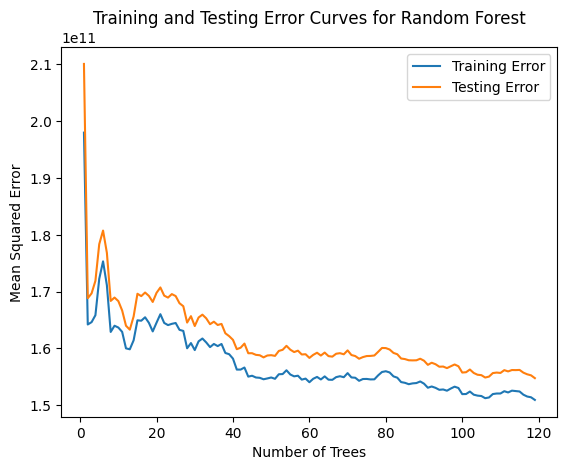

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Set more conservative hyperparameters
min_samples_leaf = 10
min_samples_split = 20
max_depth = 5
max_features = 'sqrt'

# Retrain with adjusted parameters
train_errors = []
test_errors = []
for n_estimators in range(1, 120):
    forest_reg = RandomForestRegressor(
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42,
        bootstrap=True
    )

    forest_reg.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = forest_reg.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    # Predict on the test set
    y_test_pred = forest_reg.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Calculate the final RMSE values
final_rmse_train = np.sqrt(train_errors[-1])
final_rmse_test = np.sqrt(test_errors[-1])

print(f'Final RMSE (Training): {final_rmse_train}')
print(f'Final RMSE (Testing): {final_rmse_test}')

# Visualize the training and testing error curves
plt.plot(range(1, 120), train_errors, label='Training Error')
plt.plot(range(1, 120), test_errors, label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error Curves for Random Forest')
plt.legend()
plt.show()


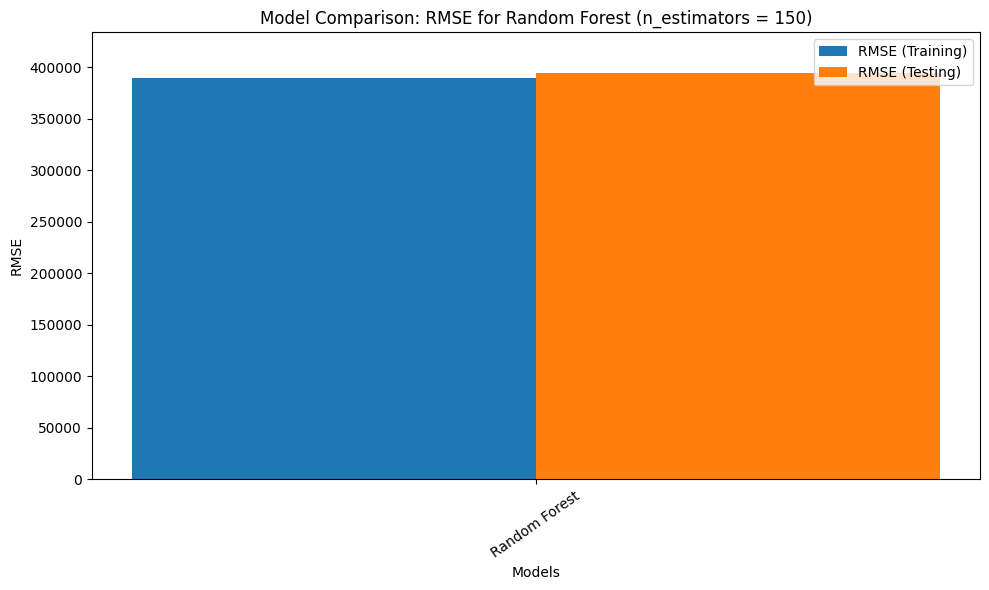

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']]
y = df['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set hyperparameters for Random Forest
min_samples_leaf = 10
min_samples_split = 20
max_depth = 5
max_features = 'sqrt'
n_estimators = 100  # Fixed number of trees

# Instantiate and fit the Random Forest model
forest_reg = RandomForestRegressor(
    n_estimators=n_estimators,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    max_depth=max_depth,
    max_features=max_features,
    random_state=42,
    bootstrap=True
)

forest_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = forest_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on the test set
y_test_pred = forest_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Prepare RMSE values for plotting
rmse_values = pd.DataFrame({
    'Model': ['Random Forest'],
    'RMSE (Training)': [rmse_train],
    'RMSE (Testing)': [rmse_test]
})

# Plotting
bar_width = 0.35
x = np.arange(len(rmse_values))

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values['RMSE (Training)'], width=bar_width, label='RMSE (Training)', align='center')
plt.bar(x + bar_width, rmse_values['RMSE (Testing)'], width=bar_width, label='RMSE (Testing)', align='center')
plt.xticks(x + bar_width / 2, rmse_values['Model'], rotation=35)
plt.legend()
plt.ylim([0, max(rmse_train, rmse_test) * 1.1])  # Adjust the y-axis limit as needed
plt.title('Model Comparison: RMSE for Random Forest (n_estimators = 150)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()


### In conclusion, although we successfully prevented our model from overfitting, we were not able to achieve the desired RMSE or outperform the GradientBoostingRegressor model.